<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3 - Classification**


In [1]:
# step1: importing MNIST
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)
"""
as_frame : If True, the data is a pandas DataFrame including columns with
appropriate dtypes (numeric, string or categorical). The target is
a pandas DataFrame or Series depending on the number of target_columns.
The Bunch will contain a frame attribute with the target and the
data. If return_X_y is True, then (data, target) will be pandas
DataFrames or Series as describe above.
    If as_frame is 'auto', the data and target will be converted to
DataFrame or Series as if as_frame is set to True, unless the dataset
is stored in sparse format.
    If as_frame is False, the data and target will be NumPy arrays and
the data will only contain numerical values when parser="liac-arff"
where the categories are provided in the attribute categories of the
Bunch instance. When parser="pandas", no ordinal encoding is made.
"""

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


'\nas_frame : If True, the data is a pandas DataFrame including columns with\nappropriate dtypes (numeric, string or categorical). The target is\na pandas DataFrame or Series depending on the number of target_columns.\nThe Bunch will contain a frame attribute with the target and the\ndata. If return_X_y is True, then (data, target) will be pandas\nDataFrames or Series as describe above.\n    If as_frame is \'auto\', the data and target will be converted to\nDataFrame or Series as if as_frame is set to True, unless the dataset\nis stored in sparse format.\n    If as_frame is False, the data and target will be NumPy arrays and\nthe data will only contain numerical values when parser="liac-arff"\nwhere the categories are provided in the attribute categories of the\nBunch instance. When parser="pandas", no ordinal encoding is made.\n'

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
type(mnist)


sklearn.utils._bunch.Bunch

In [6]:
mnist.values()

dict_values([array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), None, {}, ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pi

In [7]:
X, y = mnist.data ,  mnist.target

In [8]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
X.shape

(70000, 784)

In [11]:
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y.shape

(70000,)

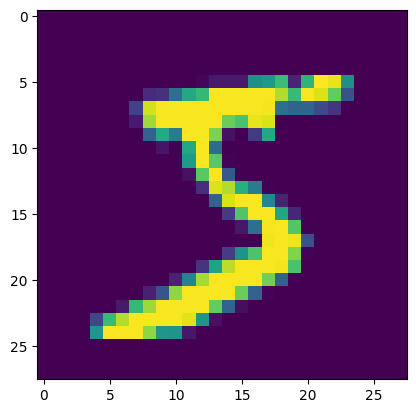

In [13]:
#printing one io the data as img
import matplotlib.pyplot as plt

def plot_digit2(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image)


some_digit = X[0]
plot_digit2(some_digit)

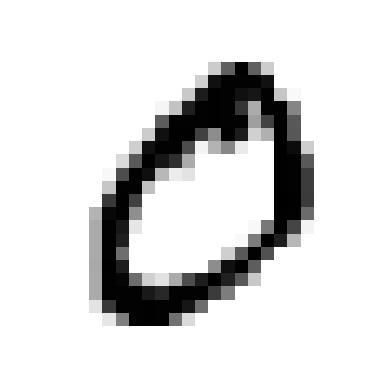

In [14]:

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")


some_digit = X[1]
plot_digit(some_digit)
plt.show()

In [15]:
y[0], y[1]

('5', '0')

In [16]:
enumerate(X[:2])

In [17]:
print(enumerate(X[:2]))

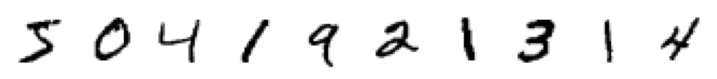

In [18]:
plt.figure(figsize=(9,9))
for index , image_data in enumerate(X[:10]):
  plt.subplot(1,10, index+1)
  plot_digit(image_data)


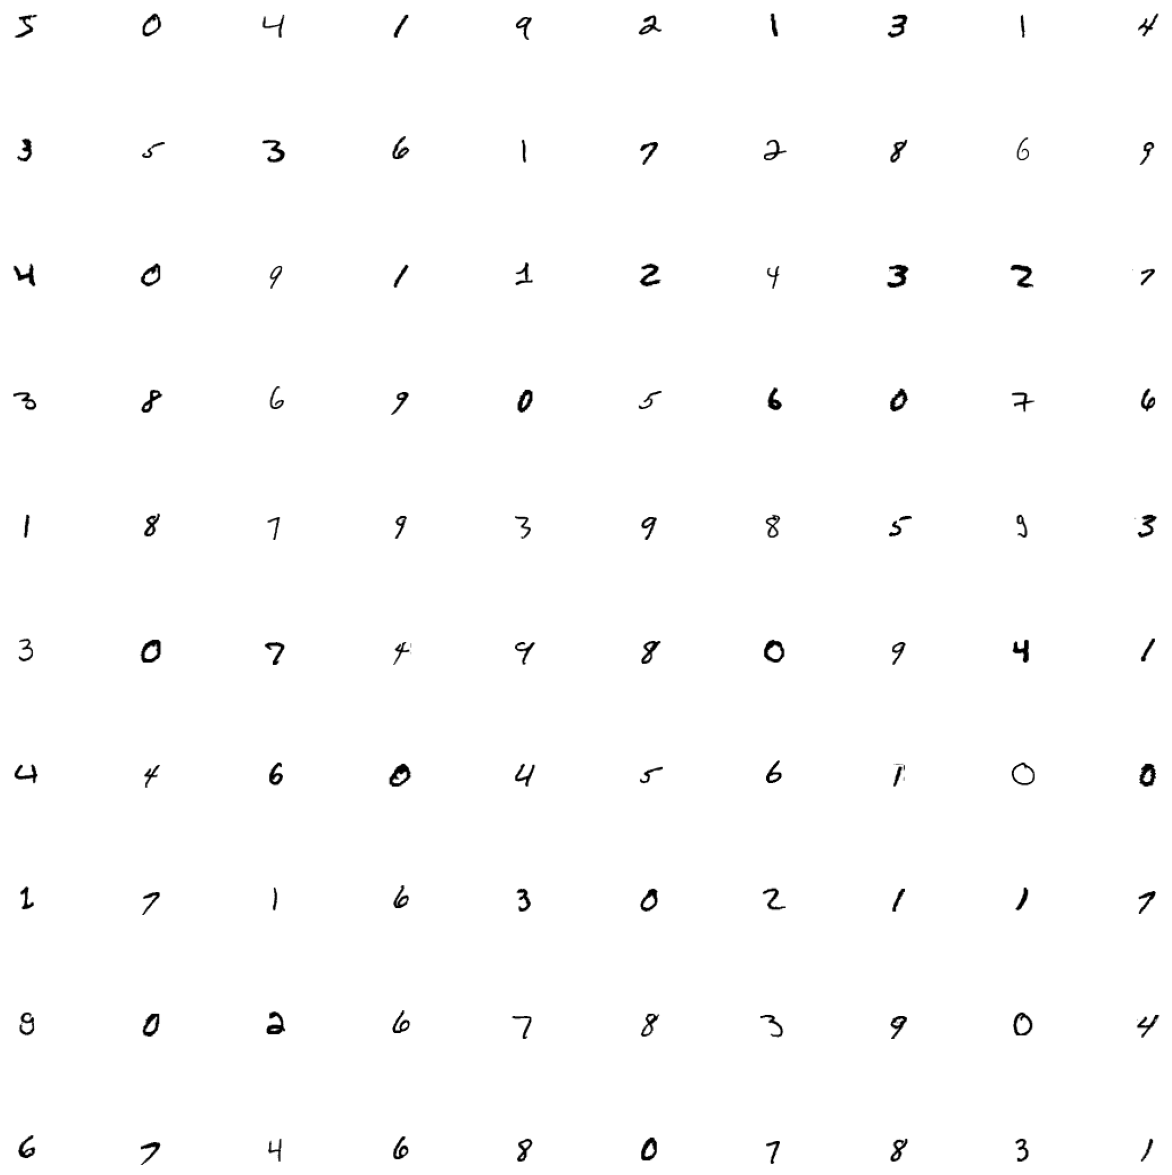

In [22]:
plt.figure(figsize=(15,15))
for index , image_data in enumerate(X[:100]):
  plt.subplot(10,10, index+1)
  plot_digit(image_data)
plt.subplots_adjust(wspace=2, hspace=3)
plt.show()

In [23]:
X_train, X_test , y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
y_train_5 = (y_train =="5") #true for all 5s, and false for all other digits
y_test_5 = (y_test=="5")

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd_clf = SGDClassifier(random_state=42)

In [27]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([some_digit])

array([False])

In [29]:
sgd_clf.predict(X[0])

ValueError: ignored

In [30]:
sgd_clf.predict([X[0]])

array([ True])

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [32]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #prints False: no 5s detected

False


In [33]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [35]:
# Implement Cross Validation Yourself!
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) #add shuffle = True if the dataset 
                                        # is not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [36]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
"""
cross_val_predict() performs k-fold cross-validation, 
instead of returning the evaluation scores, it returns the predictions made 
on each test fold. This means that you get a clean prediction for each
instance in the training set"""

In [38]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [39]:
y_train_pred.shape

(60000,)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [41]:
"""
Each row in a confusion matrix: an actual class
each column: a predicted class
The first row considers non-5 images (the negative class): 
53,892 of them were correctly classified as non-5s (true negatives), 
the remaining 687 were wrongly classified as 5s (false positives / type I errors)
The second row considers the images of 5s (the positive class):
1,891 were wrongly classified as non-5s (false negatives/ type II errors),
the remaining 3,530 were correctly classified as 5s (true positives)
A perfect classifier would only have true positives and true negatives
its confusion matrix would have nonzero values only on its main diagonal 
(top left to bottom right)"""

y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [42]:
confusion_matrix(y_train_perfect_predictions,y_train_5)

array([[54579,     0],
       [    0,  5421]])